<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/mars/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [12]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [13]:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [14]:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

<AxesSubplot:>

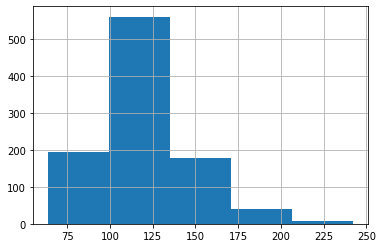

In [15]:
movies['duration'].hist(bins=5)

#### Use a box plot to display that same data.

<AxesSubplot:>

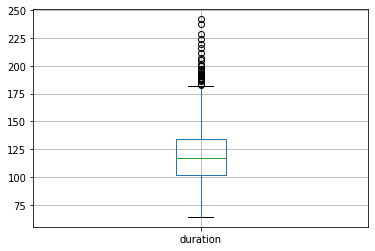

In [16]:
movies.boxplot(column='duration')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [17]:
movies.groupby('content_rating')['title'].count().sort_values(ascending=False)

content_rating
R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

<AxesSubplot:ylabel='content_rating'>

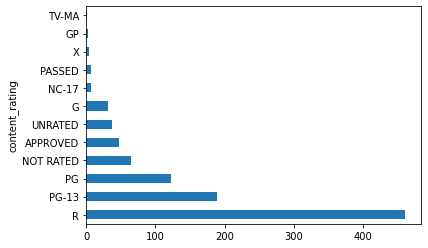

In [18]:
mov_disp = movies.groupby('content_rating')['title'].count().sort_values(ascending=False)
mov_disp.plot.barh()

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [19]:
movies['content_rating'] = movies['content_rating'].replace(to_replace = ["NOT RATED", "APPROVED", "PASSED", "GP"], value = "UNRATED")

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [20]:
movies['content_rating'] = movies['content_rating'].replace(to_replace = ["X", "TV-MA"], value = "NC-17")

In [21]:
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

<AxesSubplot:ylabel='content_rating'>

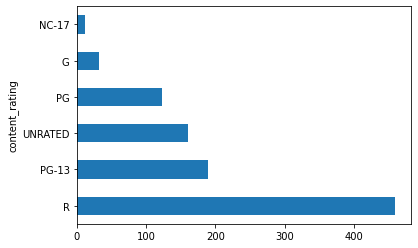

In [22]:
mov_disp2 = movies.groupby('content_rating')['title'].count().sort_values(ascending=False)
mov_disp2.plot.barh()

#### Count the number of missing values in each column.

In [23]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [24]:
movies[movies['content_rating'].isna()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [28]:
movies['content_rating'].fillna('R', inplace=True)

In [29]:
movies[movies['content_rating'].isna()]

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [42]:
movies[movies['duration'] > 120]['star_rating'].mean().round(2)

7.95

In [43]:
movies[movies['duration'] < 120]['star_rating'].mean().round(2)

7.84

#### Use a visualization to detect whether there is a relationship between duration and star rating.

<AxesSubplot:xlabel='star_rating', ylabel='duration'>

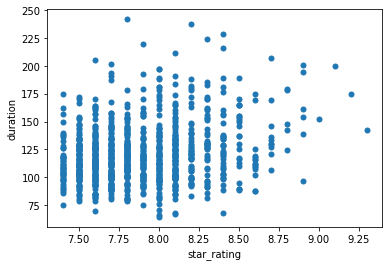

In [44]:
movies.plot.scatter(x='star_rating', y='duration', s=25)

#### Calculate the average duration for each genre.

In [47]:
movies.groupby('genre')['duration'].mean().round(2).to_frame()

,duration
genre,
Action,126.49
Adventure,134.84
Animation,96.60
Biography,131.84
Comedy,107.60
Crime,122.30
Drama,126.54
Family,107.50
Fantasy,112.00


## Advanced level

#### Visualize the relationship between content rating and duration.

#### Determine the top rated movie (by star rating) for each genre.

In [9]:
movies.groupby('genre').apply(lambda x: x['star_rating'].max())

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [64]:
dup_mov = movies[movies.duplicated()]
dup_mov

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [57]:
avg_mov = movies.groupby('genre')['star_rating'].mean()
avg_mov = avg_mov.to_frame()
avg_mov
cnt_genre = movies.groupby('genre')['star_rating'].count()
cnt_genre = cnt_genre.to_frame()
cnt_genre = cnt_genre[cnt_genre > 10]
cnt_genre
merged = cnt_genre.merge(avg_mov, on='genre')
merged.dropna()

,star_rating_x,star_rating_y
genre,,
Action,136.0,7.884559
Adventure,75.0,7.933333
Animation,62.0,7.914516
Biography,77.0,7.862338
Comedy,156.0,7.822436
Crime,124.0,7.916935
Drama,278.0,7.902518
Horror,29.0,7.806897
Mystery,16.0,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!